# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Data Source
* [New York Times](https://github.com/nytimes/covid-19-data)
* [National Oceanic and Atmospheric Administration - LA](https://w2.weather.gov/climate/xmacis.php?wfo=lox)
* [National Oceanic and Atmospheric Administration - NYC](https://w2.weather.gov/climate/index.php?wfo=okx)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Load csv
weather_df = pd.read_csv('us-counties.csv')
weather_df = weather_df[weather_df['county'].isin(['Los Angeles', 'New York City']) ]
# Convert values in ['date'] to 'datetime64[ns]'
weather_df['date'] = weather_df['date'].astype('datetime64[ns]') 
weather_df.dtypes

date      datetime64[ns]
county            object
state             object
fips             float64
cases              int64
deaths             int64
dtype: object

In [3]:
# Load excel
case_la_df = pd.read_excel('la_weather_data_2020.xlsx')
case_nyc_df = pd.read_excel('nyc_weather_data_2020.xlsx')
# Concat data frame
case_df = pd.concat([case_la_df, case_nyc_df])
case_df.dtypes

city            object
date    datetime64[ns]
max              int64
min              int64
avg            float64
dtype: object

In [4]:
# Mereg data frame
new_df = pd.merge(weather_df, case_df,  how='inner', left_on=['date','county'], right_on = ['date','city'])
# Drop colum by name
new_df = new_df.drop(['fips', 'city'], axis=1)
# Rename column
new_df = new_df.rename(columns={"cases": "total cases"})
new_df.head()

,date,county,state,total cases,deaths,max,min,avg
0,2020-01-26,Los Angeles,California,1,0,63,56,59.5
1,2020-01-27,Los Angeles,California,1,0,73,53,63.0
2,2020-01-28,Los Angeles,California,1,0,77,55,66.0
3,2020-01-29,Los Angeles,California,1,0,78,57,67.5
4,2020-01-30,Los Angeles,California,1,0,76,52,64.0


In [5]:
# Select LA data
la_df = new_df[new_df['county'].isin(['Los Angeles']) ]
# Select NYC data
nyc_df = new_df[new_df['county'].isin(['New York City'])]

# Create colume of new cases
la_df['new cases'] = la_df['total cases'] - la_df['total cases'].shift(1)
la_df = la_df.loc[la_df['total cases'] > 1] 
nyc_df['new cases'] = nyc_df['total cases'] - nyc_df['total cases'].shift(1)
nyc_df = nyc_df.loc[nyc_df['total cases'] > 1] 
la_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date,county,state,total cases,deaths,max,min,avg,new cases
41,2020-03-04,Los Angeles,California,7,0,75,58,66.5,6.0
43,2020-03-05,Los Angeles,California,11,0,75,58,66.5,4.0
45,2020-03-06,Los Angeles,California,13,0,72,57,64.5,2.0
47,2020-03-07,Los Angeles,California,14,0,67,57,62.0,1.0
49,2020-03-08,Los Angeles,California,14,0,67,52,59.5,0.0


<IPython.core.display.Javascript object>


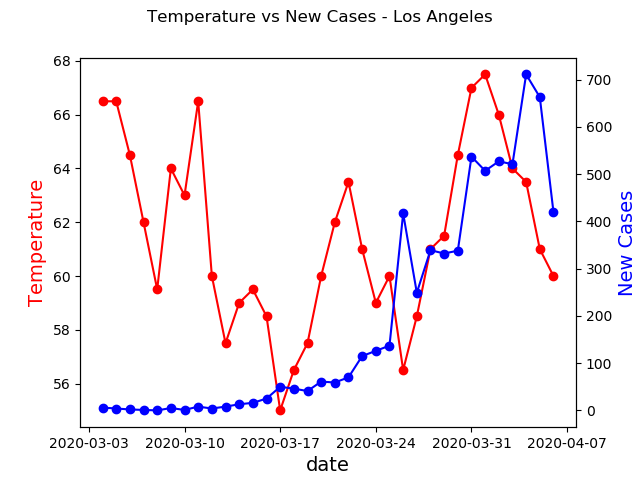

<IPython.core.display.Javascript object>


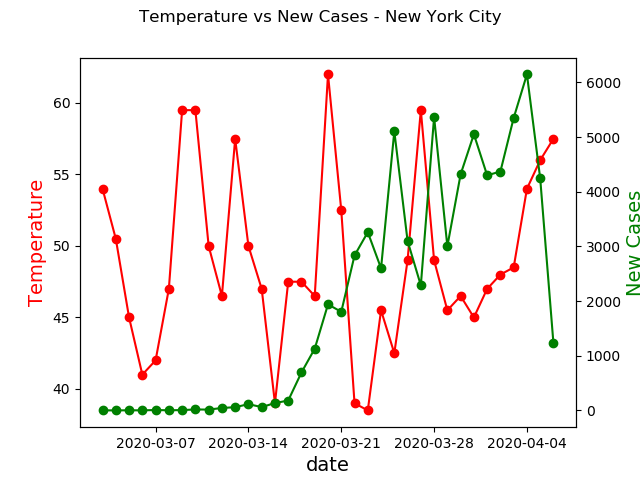

In [8]:
# Define x and y axis
x_la = la_df['date'].tolist()
y1_la = la_df['avg'].tolist()
y2_la = la_df['new cases'].tolist()

x_nyc = nyc_df['date'].tolist()
y1_nyc = nyc_df['avg'].tolist()
y2_nyc = nyc_df['new cases'].tolist()

# create figure and axis objects with subplots() - LA
fig,ax1 = plt.subplots()
# make a plot
ax1.plot(x_la, y1_la, color="red", marker="o")
# set x-axis label
ax1.set_xlabel("date",fontsize=14)
# set y-axis label
ax1.set_ylabel("Temperature",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x_la, y2_la,color="blue",marker="o")
ax2.set_ylabel("New Cases",color="blue",fontsize=14)
# Set title for chart
fig.suptitle('Temperature vs New Cases - Los Angeles')
# Save fig
plt.savefig('la.png')

# create figure and axis objects with subplots() - NYC
fig,ax3 = plt.subplots()
# make a plot
ax3.plot(x_nyc, y1_nyc, color="red", marker="o")
# set x-axis label
ax3.set_xlabel("date",fontsize=14)
# set y-axis label
ax3.set_ylabel("Temperature",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax4=ax3.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(x_nyc, y2_nyc,color="green",marker="o")
ax4.set_ylabel("New Cases",color="green",fontsize=14)
# Set title for chart
fig.suptitle('Temperature vs New Cases - New York City')
# Save fig
plt.savefig('nyc.png')

plt.show()